# <font style = "color:rgb(50,120,229)">Implementation of Morphological Operations</font>
We had discussed how to use dilation and erosion operations in the previous section. In this section, we will see what is going on under the hood. The most important concept that you need to understand is the Structuring element. We will discuss about the structuring element and how it is used for performing these morphological operations.

In [1]:
#include <iostream>

In [2]:
#include "../resource/lib/public/includeLibraries.h"
#include "../resource/lib/public/matplotlibcpp.h"
#include "../resource/lib/public/displayImages.h"
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <time.h>

In [3]:
using namespace std;

In [4]:
using namespace cv;

In [5]:
using namespace matplotlibcpp;

## <font style="color:rgb(50,120,229)">Implement Method 2</font>
1. Scan through the image and superimpose the kernel on the neighborhood of each pixel. 
1. Perform an AND operation of the neighborhood with the kernel.
1. Replace the pixel value with the `maximum` value in the neighborhood given by the kernel. 

This means that you check every pixel and its neighborhood with respect to the kernel and change the pixel to white if any of the pixel in this neighborhood is white. OpenCV implements an optimized version of this method. This will work even if the image is not a binary image.

# <font style="color:rgb(50,120,229)">Create a Demo Image</font>

## <font style="color:rgb(50,120,229)">Create an empty matrix </font>

In [6]:
Mat demoImage = Mat::zeros(Size(10,10),CV_8U);

In [7]:
cout << demoImage;

[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]

In [8]:
plt::figure();
plt::imshow(demoImage);
auto pltImg = displayImage(demoImage);

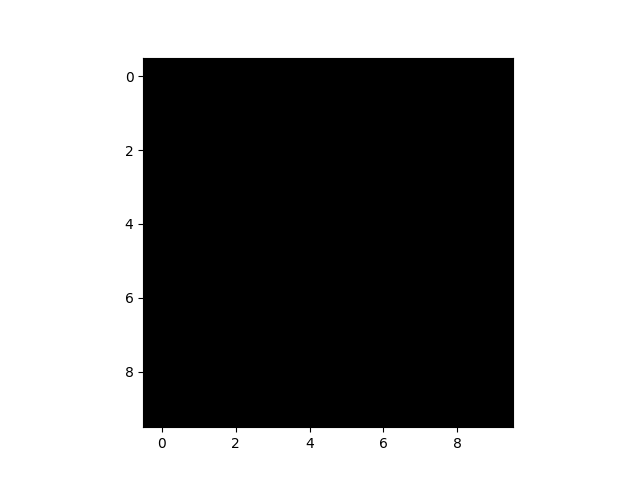

In [9]:
pltImg

## <font style="color:rgb(50,120,229)">Lets add some white blobs</font>

We have added the blobs at different places so that all boundary cases are covered in this example.

In [10]:
demoImage.at<uchar>(0,1) = 1;

In [11]:
demoImage.at<uchar>(9,0) = 1;

In [12]:
demoImage.at<uchar>(8,9) = 1;

In [13]:
demoImage.at<uchar>(2,2) = 1;

In [14]:
demoImage(Range(5,8),Range(5,8)).setTo(1);

In [15]:
cout << demoImage;

[  0,   1,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   1,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   1,   1,   1,   0,   0;
   0,   0,   0,   0,   0,   1,   1,   1,   0,   0;
   0,   0,   0,   0,   0,   1,   1,   1,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   1;
   1,   0,   0,   0,   0,   0,   0,   0,   0,   0]

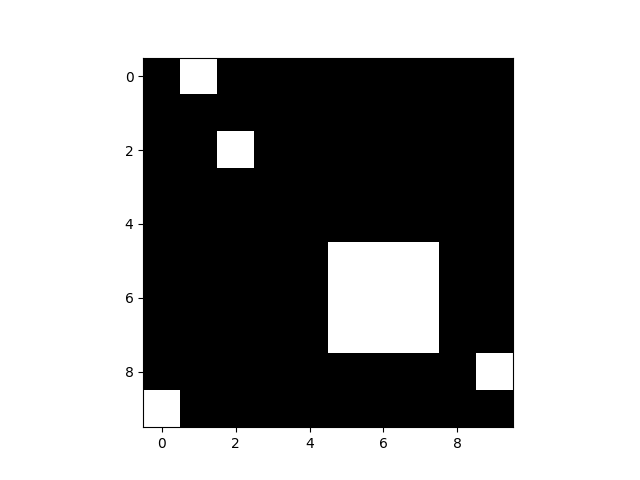

In [16]:
plt::figure();
plt::imshow(demoImage*255);
pltImg = displayImage(demoImage*255);
pltImg

This becomes our demo Image for illustration purpose

## <font style="color:rgb(50,120,229)">Create a Cross Structuring Element </font>
Let us create a 3x3 cross structuring element.

In [17]:
Mat element = getStructuringElement(MORPH_CROSS, Size(3,3));

In [18]:
cout << element;

[  0,   1,   0;
   1,   1,   1;
   0,   1,   0]

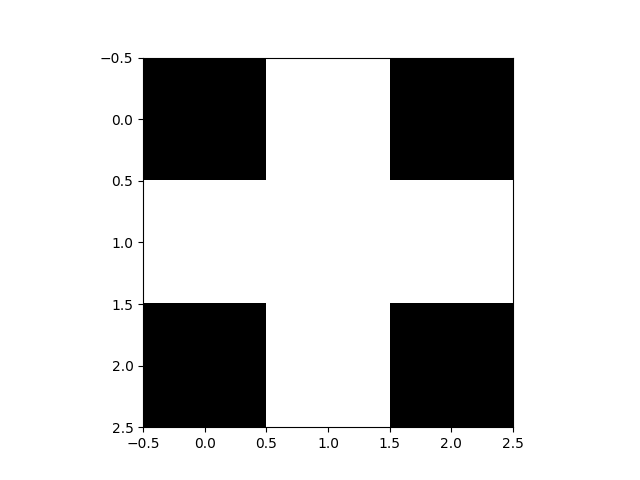

In [19]:
plt::figure();
plt::imshow(element*255);
pltImg = displayImage(element*255);
pltImg

In [20]:
int ksize = element.size().height;
cout << ksize << endl;

3


In [21]:
int height, width;
height = demoImage.size().height;
width  = demoImage.size().width;
cout << "height:" << height << endl;
cout << "width:" << width << endl;

height:10
width:10


## <font style="color:rgb(50,120,229)">First check expected output using cv::dilate</font>

In [22]:
Mat dilatedCrossKernel;
dilate(demoImage, dilatedCrossKernel, element);
cout << dilatedCrossKernel;

[  1,   1,   1,   0,   0,   0,   0,   0,   0,   0;
   0,   1,   1,   0,   0,   0,   0,   0,   0,   0;
   0,   1,   1,   1,   0,   0,   0,   0,   0,   0;
   0,   0,   1,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   1,   1,   1,   0,   0;
   0,   0,   0,   0,   1,   1,   1,   1,   1,   0;
   0,   0,   0,   0,   1,   1,   1,   1,   1,   0;
   0,   0,   0,   0,   1,   1,   1,   1,   1,   1;
   1,   0,   0,   0,   0,   1,   1,   1,   1,   1;
   1,   1,   0,   0,   0,   0,   0,   0,   0,   1]

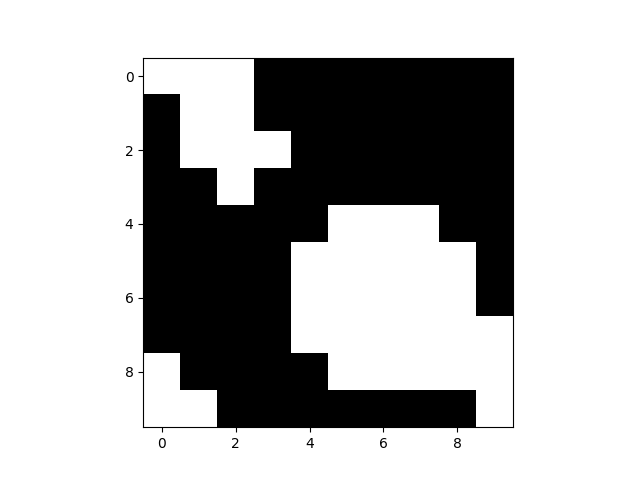

In [23]:
plt::figure();
plt::imshow(dilatedCrossKernel*255);
pltImg = displayImage(dilatedCrossKernel*255);
pltImg

In [24]:
//set the center of the element to 0 so that by bitwise
//and we can find if any neighbor is 1 or not
Mat elementClone = element.clone();
elementClone.at<uchar>(1,1) = 0;
cout << elementClone << endl;

[  0,   1,   0;
   1,   0,   1;
   0,   1,   0]


In [25]:
//move all declaration 1 cell above so that i can keep
//working on loop without getting error (duplicate declaration)
int border = ksize/2;
Mat paddedDemoImage = Mat::zeros(Size(height + border*2, width + border*2),CV_8UC1);
copyMakeBorder(demoImage,paddedDemoImage,border,border,border,border,BORDER_CONSTANT,0);

Mat paddedDilatedImage = paddedDemoImage.clone();
Mat mask;
Mat resizedFrame;

double minVal, maxVal;

Mat dstAnd;
double sumDst;
Mat resizedBGRImage;
Mat finalImage;
// Create a VideoWriter object
// Use frame size as 50x50
int frame_width = 50;
int frame_height = 50;
double fps = 10;
VideoWriter dialationavi("dilationScratch.avi", cv::VideoWriter::fourcc('M','J','P','G'), fps, Size(frame_width,frame_height));

## <font style="color:rgb(50,120,229)">Write Code for Dilation from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`dilationScratch.avi`** and display it using markdown below:

**`dilationScratch.avi` will come here**

```<video width="320" height="240" controls>
  <source src="dilationScratch.avi" type="video/mp4">
</video>```

**Note**

1. Use FPS as 10 and frame size as 50x50
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

In [26]:
//matrix bitwise and scratch area
// Mat mat3 = paddedDemoImage(Range(1-border, 1+border+1),
//                            Range(1-border,1+border+1));
// cout << mat3 << endl;
// Mat dst1;
// bitwise_and(mat3, element, dst1);
// double s1 = cv::sum( dst1 )[0];
// if(s1 > 0)
// {
//     cout << "true" << endl;
//     cv::minMaxLoc(mat3, &minVal, &maxVal);
//     cout << "max:" << maxVal << endl;
//     mat3.at<uchar>(1,1) = maxVal;
// }
// cout << dst1 << endl;
// cout << mat3 << endl;

In [27]:
for (int h_i = border; h_i < height + border; h_i++){
    for (int w_i = border; w_i < width + border; w_i++){
        mask = paddedDemoImage(Range(h_i-border,h_i+border+1),
                           Range(w_i-border,w_i+border+1));
//         cout << mask << endl;
//         cout << "Pre Mask" << endl;
        bitwise_and(mask, elementClone, dstAnd);
        sumDst = cv::sum( dstAnd )[0];
//         cout << dstAnd << endl;
        if(sumDst){
            //neighbor matrix as atleast 1 so lets make centre of OG image
            //highest of all neighbor
            cv::minMaxLoc(mask, &minVal, &maxVal);
//             Mat modifiedMask = mask.clone();
//             modifiedMask.at<uchar>(1,1) = maxVal;
            
//             modifiedMask.copyTo(paddedDilatedImage(Range(h_i-border,h_i+border+1),
//                            Range(w_i-border,w_i+border+1)));
            Mat transient = paddedDilatedImage(Range(h_i-border,h_i+border+1), Range(w_i-border,w_i+border+1));
            transient.at<uchar>(1,1) = maxVal;
//             cout << modifiedMask << endl;
//             cout << "found valid neighbor @" << h_i << "," << w_i << endl;
//             cout << paddedDilatedImage << endl;
        }
        // Resize output to 50x50 before writing it to the video
        resize(paddedDilatedImage, resizedFrame, Size(frame_width, frame_height), INTER_LINEAR);
        // Convert resizedFrame to BGR before writing
        cvtColor (resizedFrame*255, resizedBGRImage, COLOR_GRAY2BGR );
        //write frame
        dialationavi.write(resizedBGRImage);
//         cout << "-----" << endl;
    }
}

// Release the VideoWriter object
dialationavi.release();
// cout << paddedDilatedImage << endl;

10
10


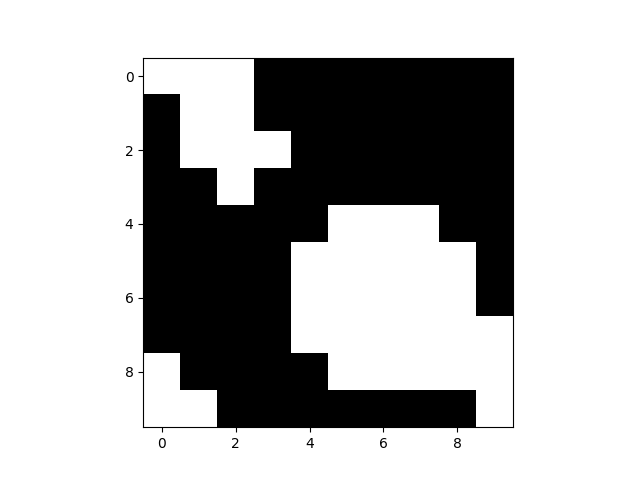

In [28]:
// Display final image (cropped)
finalImage = paddedDilatedImage(Range(border,height+border),Range(border,width+border));
cout << finalImage.size().width << endl;
cout << finalImage.size().height << endl;
plt::figure();
plt::imshow(finalImage*255);
pltImg = displayImage(finalImage*255);
pltImg


In [29]:
bool eq = cv::countNonZero(dilatedCrossKernel!=finalImage) == 0;
if(eq) {
    cout << "Both Dialted matrix are equal" << endl;
}
else {
    cout << "Dialted matrix are different" << endl;
}


Both Dialted matrix are equal


<video width="320" height="240" controls>
  <source src="dilationScratch.avi" type="video/mp4">
</video>

# <font style="color:rgb(50,120,229)">Implement Erosion </font>

## <font style="color:rgb(50,120,229)">First check expected output using cv::erode</font>

In [30]:
Mat ErodedCrossKernel;
erode(demoImage, ErodedCrossKernel, element);
cout << ErodedCrossKernel << endl;
cout << element << endl;

[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   1,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0;
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
[  0,   1,   0;
   1,   1,   1;
   0,   1,   0]


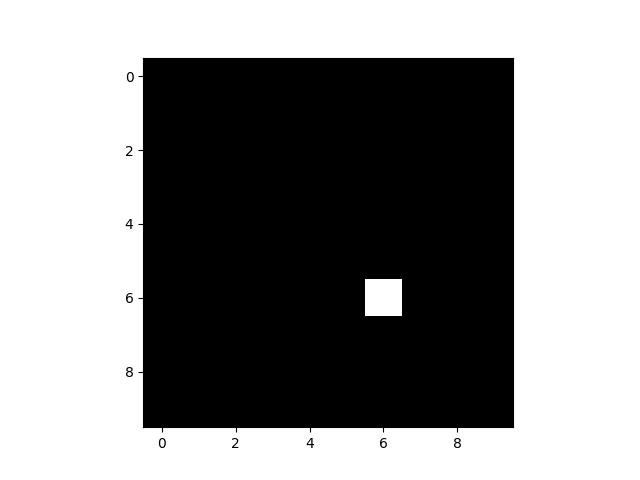

In [31]:
plt::figure();
plt::imshow(ErodedCrossKernel*255);
pltImg = displayImage(ErodedCrossKernel*255);
pltImg

## <font style="color:rgb(50,120,229)">Write code for Erosion from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`erosionScratch.avi`** and display it using markdown below:

**`erosionScratch.avi` will come here**

```<video width="320" height="240" controls>
  <source src="erosionScratch.avi" type="video/mp4">
</video>```

**Note**

1. Use FPS as 10 and frame size as 50x50
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

In [32]:
border = ksize/2;
paddedDemoImage = Mat::zeros(Size(height + border*2, width + border*2),CV_8UC1);
copyMakeBorder(demoImage,paddedDemoImage,border,border,border,border,BORDER_CONSTANT,0);

Mat paddedErodedImage = paddedDemoImage.clone();
Mat resizedFrameEroded;
Mat resizedBGRImageEroded;
Mat finalImageEroded;

// Create a VideoWriter object
// Use frame size as 50x50
VideoWriter erosionavi("erosionScratch.avi", cv::VideoWriter::fourcc('M','J','P','G'), fps, Size(frame_width,frame_height));

for (int h_i = border; h_i < height + border; h_i++){
    for (int w_i = border; w_i < width + border; w_i++){
        mask = paddedDemoImage(Range(h_i-border,h_i+border+1),
                           Range(w_i-border,w_i+border+1));
//         cout << mask << endl;
//         cout << "Pre Mask" << endl;
        bitwise_or(mask, elementClone, dstAnd);
        sumDst = cv::sum( dstAnd )[0];
//         cout << dstAnd << endl;
        if(sumDst){
            //neighbor matrix as atleast 1 so lets make centre of OG image
            //highest of all neighbor
            cv::minMaxLoc(mask, &minVal, &maxVal);
//             Mat modifiedMask = mask.clone();
//             modifiedMask.at<uchar>(1,1) = maxVal;
            
//             modifiedMask.copyTo(paddedDilatedImage(Range(h_i-border,h_i+border+1),
//                            Range(w_i-border,w_i+border+1)));
            Mat transient = paddedErodedImage(Range(h_i-border,h_i+border+1), Range(w_i-border,w_i+border+1));
            transient.at<uchar>(1,1) = minVal;
//             cout << modifiedMask << endl;
//             cout << "found valid neighbor @" << h_i << "," << w_i << endl;
//             cout << paddedDilatedImage << endl;
        }
        // Resize output to 50x50 before writing it to the video
        resize(paddedErodedImage, resizedFrameEroded, Size(frame_width, frame_height), INTER_LINEAR);
        // Convert resizedFrame to BGR before writing
        cvtColor (resizedFrameEroded*255, resizedBGRImageEroded, COLOR_GRAY2BGR );
        //write frame
        erosionavi.write(resizedBGRImageEroded);
    }
}

// Release the VideoWriter object
erosionavi.release();

10
10


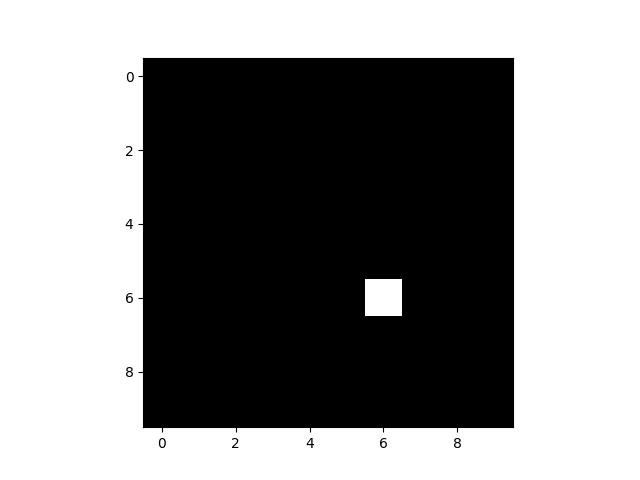

In [33]:
// Display final image (cropped)
finalImageEroded = paddedErodedImage(Range(border,height+border),Range(border,width+border));
cout << finalImageEroded.size().width << endl;
cout << finalImageEroded.size().height << endl;
plt::figure();
plt::imshow(finalImageEroded*255);
pltImg = displayImage(finalImageEroded*255);
pltImg

In [34]:
bool eqEroded = cv::countNonZero(ErodedCrossKernel!=finalImageEroded) == 0;
if(eqEroded) {
    cout << "Both Eroded matrix are equal" << endl;
}
else {
    cout << "Eroded matrix are different" << endl;
}

Both Eroded matrix are equal
